In [54]:
msg = "Hello"
print(msg)

Hello


In [55]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Doc du lieu file
gd = pd.read_csv('gold_prices.csv')
gd.head()

,Date,Price High,Price Low,Price Open,Price Close
0,1/4/2010,1122.300049,1097.099976,1117.699951,1117.699951
1,1/5/2010,1126.500000,1115.000000,1118.099976,1118.099976
2,1/6/2010,1139.199951,1120.699951,1135.900024,1135.900024
3,1/7/2010,1133.099976,1129.199951,1133.099976,1133.099976
4,1/8/2010,1138.199951,1122.699951,1138.199951,1138.199951


In [56]:
#Chuyen doi cot Date sang dinh dang datetime
gd["Date"] = pd.to_datetime(gd["Date"]) 

In [57]:
gd["Date"] = gd["Date"].map(lambda x: x.toordinal())

In [58]:
X = gd.drop(["Price Close"], axis=1)

In [59]:
print(gd.isna().sum())

Date           0
Price High     0
Price Low      0
Price Open     0
Price Close    0
dtype: int64


In [60]:
X = gd.iloc[:,:-1]
X

,Date,Price High,Price Low,Price Open
0,733776,1122.300049,1097.099976,1117.699951
1,733777,1126.500000,1115.000000,1118.099976
2,733778,1139.199951,1120.699951,1135.900024
3,733779,1133.099976,1129.199951,1133.099976
4,733780,1138.199951,1122.699951,1138.199951
...,...,...,...,...
2760,737782,1878.800049,1864.500000,1867.000000
2761,737783,1879.900024,1875.699951,1877.300049
2762,737787,1895.800049,1873.699951,1895.500000
2763,737788,1881.300049,1879.699951,1881.300049


In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2765 non-null   int64  
 1   Price High  2765 non-null   float64
 2   Price Low   2765 non-null   float64
 3   Price Open  2765 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 86.5 KB


In [62]:
Y = gd['Price Close']
Y

0       1117.699951
1       1118.099976
2       1135.900024
3       1133.099976
4       1138.199951
           ...     
2760    1874.699951
2761    1879.900024
2762    1877.199951
2763    1879.699951
2764    1891.000000
Name: Price Close, Length: 2765, dtype: float64

In [63]:
#Chia training va test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [64]:
X.shape, Y.shape

((2765, 4), (2765,))

In [65]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1935, 4), (1935,), (830, 4), (830,))

In [66]:
#Mo hinh Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
#Du doan
pred = model.predict(X_test)
y_pred = model.predict(X_test)

In [68]:
#Danh gia mo hinh
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("Kết quả mô hình Linear Regression:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2:   {r2:.4f}")

Kết quả mô hình Linear Regression:
MAE:  3.5312
RMSE: 5.4852
R2:   0.9993


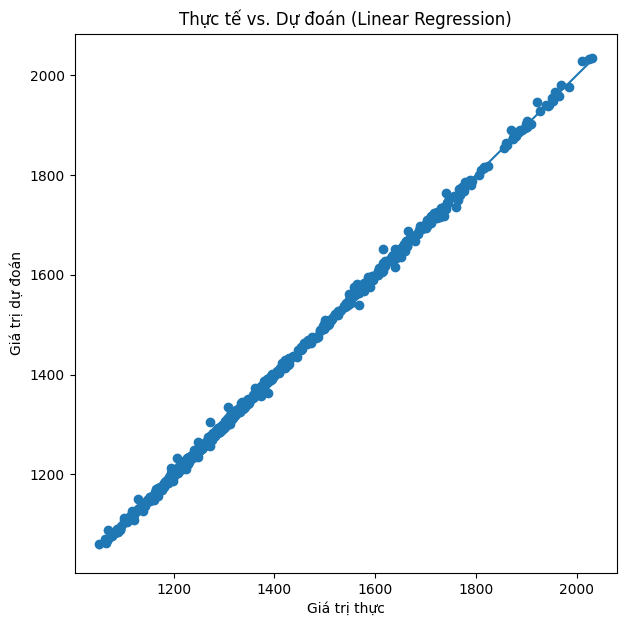

In [69]:
#Bieu do thuc te vs du doan
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel("Giá trị thực")
plt.ylabel("Giá trị dự đoán")
plt.title("Thực tế vs. Dự đoán (Linear Regression)")
plt.show()


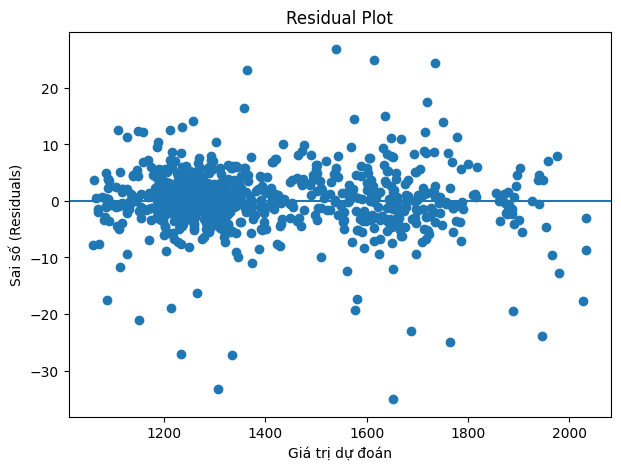

In [70]:
#Bieu do sai so residual plot
residuals = Y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Sai số (Residuals)")
plt.title("Residual Plot")
plt.show()


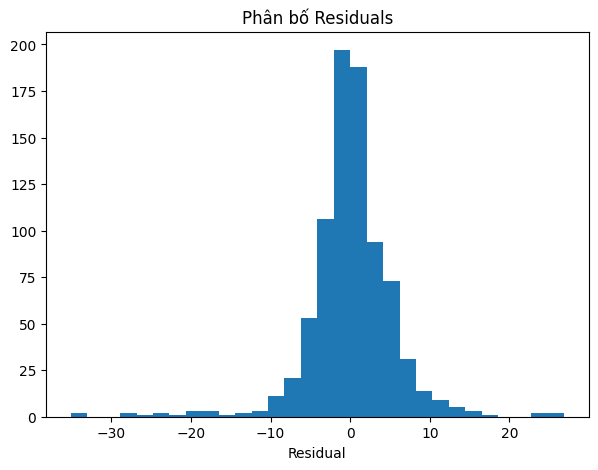

In [71]:
#Phan bo residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.title("Phân bố Residuals")
plt.show()

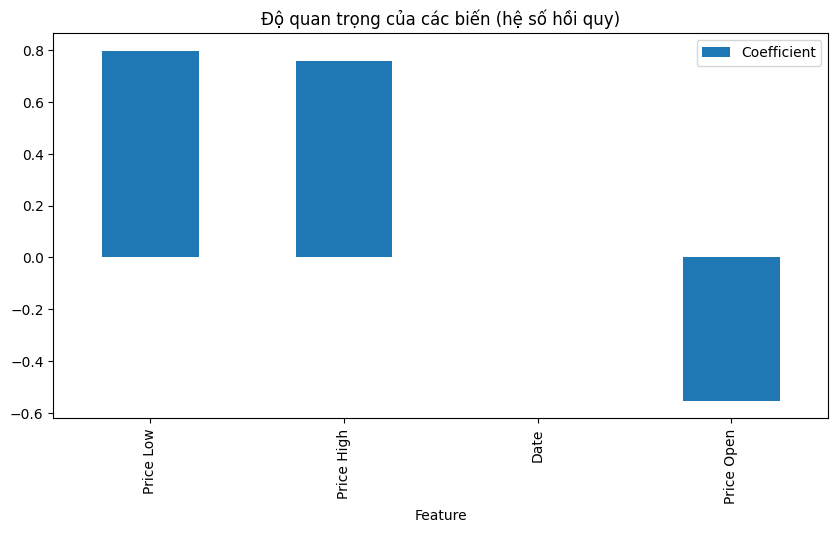

In [72]:
#Do thi do quan trong cua cac bienn
import pandas as pd
import numpy as np

coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient", ascending=False)

coeff.plot(kind="bar", x="Feature", figsize=(10,5))
plt.title("Độ quan trọng của các biến (hệ số hồi quy)")
plt.show()

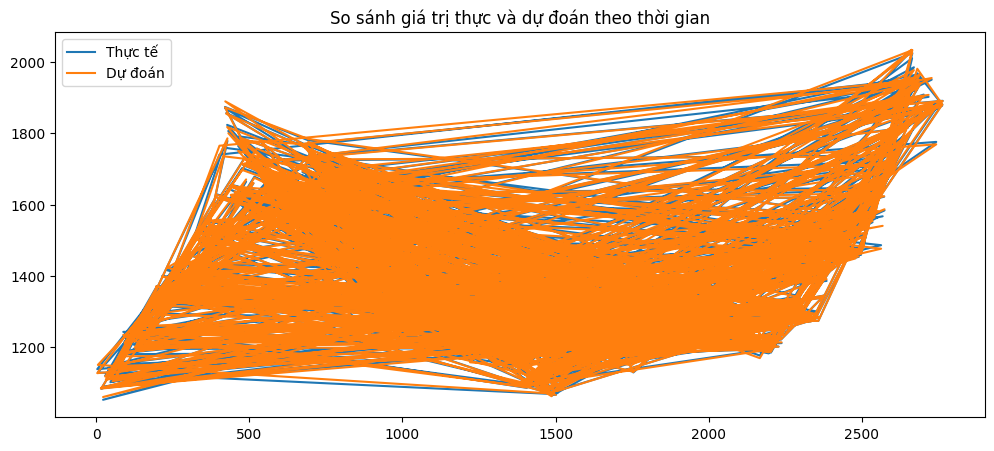

In [73]:
#Bieu do thuc te vs du doan theo thoi gian
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test, label="Thực tế")
plt.plot(Y_test.index, y_pred, label="Dự đoán")
plt.legend()
plt.title("So sánh giá trị thực và dự đoán theo thời gian")
plt.show()